# EZMenuMaker for Colab
by ym0346\
Google Colaboratory上で動作するMenu作成ツールです。\
アップロードされた画像を自動でリサイズして、背景つきのSZSを作成することができます。\
テクスチャハックの知識がない方や、ローカルでSZSを編集する環境がない方向けのツールです。\
背景画像の変更に特化しているものなので、その他の内部ファイルを編集する場合はローカルで編集してください。


### 対応している画像フォーマット一覧
- png
- jpg
- jpeg
- webp
- bmp
- gif
- tiff

### 作成できるSZSファイル一覧
- MenuSingle.szs
- MenuMulti.szs (マルチプレイヤー用ファイル)
- MenuOther.szs (ライセンス設定などで使用)
- Title.szs / Title_J.szs (タイトル画面 J=リージョン)
- Channel.szs (共通設定、マリオカートチャンネルで使用)

# Googleドライブのマウント
Googleドライブ上で、ファイルを読み書きするために必要なコードです。\
アクセス許可を問われたら、「**Googleドライブに接続**」をクリックして認証に進みましょう。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Wiimms SZS Tools(WSZST)の導入
アップロードされた画像をTPLファイルに変換し、SZSに圧縮するまでの作業を行うためのツールです。\
実行環境はUbuntu(Linuxディストリビューションの１つ)で動作しているので、Linuxコマンドを使用してWSZSTを導入します。

In [2]:
!wget https://szs.wiimm.de/download/szs-v2.42a-r8989-x86_64.tar.gz
!tar -xzf szs-v2.42a-r8989-x86_64.tar.gz
!cd szs-v2.42a-r8989-x86_64 && sudo ./install.sh

--2025-03-25 03:17:12--  https://szs.wiimm.de/download/szs-v2.42a-r8989-x86_64.tar.gz
Resolving szs.wiimm.de (szs.wiimm.de)... 88.99.63.105
Connecting to szs.wiimm.de (szs.wiimm.de)|88.99.63.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15957988 (15M) [application/x-gzip]
Saving to: ‘szs-v2.42a-r8989-x86_64.tar.gz’

szs-v2.42a-r8989-x8 100%[===================>]  15.22M  12.9MB/s    in 1.2s    

2025-03-25 03:17:14 (12.9 MB/s) - ‘szs-v2.42a-r8989-x86_64.tar.gz’ saved [15957988/15957988]

*** install binaries to /usr/local/bin
*** install share files to /usr/local/share/szs


# 導入できているかどうかを確認するためのコマンド
正常に導入できていれば、WSZSTの情報が表示されるはずです。

In [3]:
!wszst


		***********************************
		*     _______ _______ _______     *
		*    |  ___  |____   |  ___  |    *
		*    | |   |_|    / /| |   |_|    *
		*    | |_____    / / | |_____     *
		*    |_____  |  / /  |_____  |    *
		*     _    | | / /    _    | |    *
		*    | |___| |/ /____| |___| |    *
		*    |_______|_______|_______|    *
		*                                 *
		*        Wiimms SZS Tools         *
		*      https://szs.wiimm.de/      *
		*                                 *
		***********************************

wszst: Wiimms SZS Tool v2.42a r8989 x86_64 - Dirk Clemens - 2024-03-26
Visit https://szs.wiimm.de/wszst for more info.

-> Type 'wszst -h' or 'wszst help' (pipe it to a pager like 'less') for more help.



# ファイルの準備

In [4]:
# backupフォルダからMenuAssetsフォルダにSZSをコピーする
!cp -r "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/backup"/* "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets"

In [5]:
# .dファイルを削除
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d"
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d"
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d"
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d"
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d"
!rm -rf "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d"

In [6]:
# MenuAssetsフォルダの表示
!ls -l "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets"

total 6989
drwx------ 2 root root    4096 Mar 25 03:12 backup
-rw------- 1 root root 2257333 Mar 25 03:17 Channel.szs
-rw------- 1 root root 1005156 Mar 25 03:17 MenuMulti.szs
-rw------- 1 root root 1973924 Mar 25 03:17 MenuOther.szs
-rw------- 1 root root 1381746 Mar 25 03:17 MenuSingle.szs
-rw------- 1 root root  112284 Mar 25 03:17 Title_J.szs
-rw------- 1 root root  420260 Mar 25 03:17 Title.szs


In [7]:
# SZSを展開する
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.szs"
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.szs"
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.szs"
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.szs"
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.szs"
!wszst x "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.szs"

EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/
EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/
EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/
EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/
EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/
EXTRACT YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.szs -> /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d/


# 画像をリサイズするPythonコード
このコードを実行すると、画像ファイルを受け付けが始まります。\
アップロードをすると自動で処理が始まり、832x456にリサイズします。

画像ファイルをアップロードしてください（対応形式: .png, .jpg, .jpeg, .webp, .bmp, .gif, .tiff）


Saving harunokouen.jpg to harunokouen.jpg


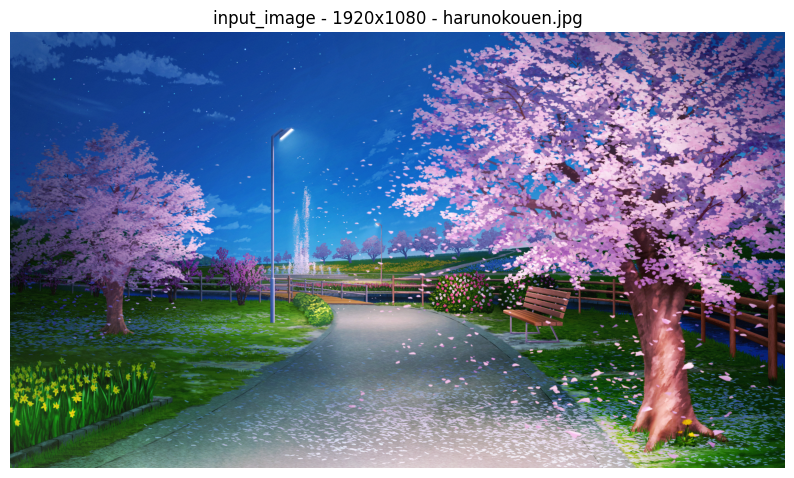

画像を(832, 456)にリサイズしています...


  0%|          | 0/1 [00:00<?, ?it/s]

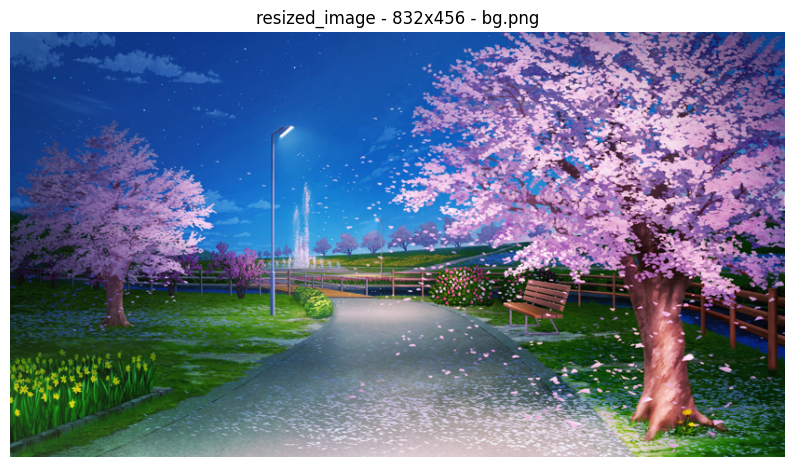


処理結果:
- 元の画像フォーマット: .jpg
- リサイズ後: 832x456 PNG


In [8]:
from PIL import Image
import os
from google.colab import files
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import shutil

# 対応する画像形式の拡張子リスト
SUPPORTED_FORMATS = ['.png', '.jpg', '.jpeg', '.webp', '.bmp', '.gif', '.tiff']

# Colabでのファイルアップロード
def upload_files():
    """
    ユーザーからファイルをアップロードする関数
    """
    print(f"画像ファイルをアップロードしてください（対応形式: {', '.join(SUPPORTED_FORMATS)}）")
    uploaded = files.upload()

    # 一時的な入力ディレクトリを作成
    os.makedirs("input", exist_ok=True)

    # アップロードされたファイルを入力ディレクトリに移動
    valid_files = []
    for filename, content in uploaded.items():
        ext = os.path.splitext(filename.lower())[1]
        if ext in SUPPORTED_FORMATS:
            with open(os.path.join("input", filename), 'wb') as f:
                f.write(content)
            valid_files.append(filename)

    if len(valid_files) < len(uploaded):
        print(f"注意: {len(uploaded) - len(valid_files)}個のファイルは対応形式ではないため処理されません。")

    return valid_files

def resize_image(input_path, output_path, target_size):
    """
    指定された画像ファイルをリサイズして保存する関数

    Parameters:
    input_path (str): 入力画像ファイルのパス
    output_path (str): 出力画像ファイルのパス（PNG形式）
    target_size (tuple): リサイズ後のサイズ (幅, 高さ)
    """
    try:
        # 画像ファイルを開く
        with Image.open(input_path) as img:
            # RGBAモードでない場合はRGBモードに変換（PNGで保存するため）
            if img.mode != 'RGBA' and img.mode != 'RGB':
                img = img.convert('RGB')

            # 指定されたサイズにリサイズ
            resized_img = img.resize(target_size)

            # 出力ディレクトリが存在しない場合は作成
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # リサイズした画像をPNG形式で保存
            resized_img.save(output_path, format='PNG')

            return True
    except Exception as e:
        print(f"エラーが発生しました ({input_path}): {e}")
        return False

def preview_image(image_path, title="画像"):
    """
    画像をプレビュー表示する関数
    """
    img = Image.open(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(f"{title} - {img.width}x{img.height} - {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

def main():
    # ユーザーに画像をアップロードしてもらう
    uploaded_files = upload_files()

    if not uploaded_files:
        print("ファイルがアップロードされませんでした。")
        return

    # 入力フォルダと出力フォルダのパス
    input_folder = "input"
    output_folder = "output"

    # 出力フォルダが存在しない場合は作成
    os.makedirs(output_folder, exist_ok=True)

    # リサイズ後のサイズ (幅, 高さ)
    target_size = (832, 456)

    # 処理前の最初の画像を表示
    first_img = os.path.join(input_folder, uploaded_files[0])
    preview_image(first_img, "input_image")

    print(f"画像を{target_size}にリサイズしています...")

    # 全ての対応画像ファイルをリサイズ（進捗バー付き）
    for idx, img_file in enumerate(tqdm(uploaded_files)):
        input_file = os.path.join(input_folder, img_file)

        if idx == 0:  # 最初のファイルはbg.pngとして保存
            output_file = os.path.join(output_folder, "bg.png")
        else:  # その他のファイルは元のファイル名（拡張子はpng）で保存
            filename_without_ext = os.path.splitext(img_file)[0]
            output_file = os.path.join(output_folder, f"{filename_without_ext}.png")

        resize_image(input_file, output_file, target_size)

    # リサイズされた画像を表示
    output_file = os.path.join(output_folder, "bg.png")
    preview_image(output_file, "resized_image")

    print("\n処理結果:")
    print(f"- 元の画像フォーマット: {os.path.splitext(uploaded_files[0])[1]}")
    print(f"- リサイズ後: {target_size[0]}x{target_size[1]} PNG")

    # 他の処理された画像がある場合
    if len(uploaded_files) > 1:
        print("\n他の処理された画像をダウンロードするには:")
        for idx, img_file in enumerate(uploaded_files[1:], 1):
            filename_without_ext = os.path.splitext(img_file)[0]
            print(f"files.download('output/{filename_without_ext}.png')  # 元のファイル: {img_file}")

if __name__ == "__main__":
    main()

# WSZSTのコマンドでSZSを作成する
実行すると、先ほどリサイズしたpngをtplに変換して、SZSを作成します。\
ファイルの容量を気にする場合は、RGB5A3と書いてあるところをCMPRに変更してください。\
画質と引き換えに、より軽量なフォーマットで変換できます。\
よほどのことがない限り変更する必要はありませんので、わからない場合は**そのままで大丈夫です**。

# 背景画像を見やすくするために
背景画像を見やすくするためのファイル変更を行うことができます。
変更点は以下の通りです。
- 上下の帯、チェック柄などを削除
- 「メンバーのかくにん」や「コースとうひょう」で表示されるネームプレートの透明化
- 「ライセンス設定」の「きろくをみる」で表示されるテクスチャの透明化

こちらは任意でつけることができるものですので、ファイル変更を行いたい場合のみ\
"**# 背景画像を見やすくするためのファイル変更はこれを実行**"と記載されたコマンドを実行してください。

### 背景変更に使用した画像クレジット
- みんちりえ 様（ https://min-chi.material.jp/ ）


## MenuSingleを作成する場合はこのコードを実行

In [9]:
# MenuSingle
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB5A3
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/bg.tpl"

In [10]:
# 背景画像を見やすくするためのファイル変更はこれを実行
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_block_16x16.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_bottom_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_bottom_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_bottom_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_check_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_top_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_top_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/bg/timg/tt_obi_top_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/common_w058_vote.brlyt" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/control/blyt/common_w058_vote.brlyt"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/common_w100_earth_mii_point_wifi.brlyt" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/control/blyt/common_w100_earth_mii_point_wifi.brlyt"

In [11]:
#SZSの生成
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuSingle.szs


In [12]:
# ファイルのダウンロードはこのコードを実行
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/MenuSingle.szs')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MenuMultiを作成する場合はこのコードを実行

In [13]:
# MenuMulti
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB5A3
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/bg.tpl"

In [14]:
# 背景画像を見やすくするためのファイル変更はこれを実行
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_block_16x16.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_bottom_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_bottom_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_bottom_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_check_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_top_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_top_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/bg/timg/tt_obi_top_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/common_w058_vote.brlyt" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/control/blyt/common_w058_vote.brlyt"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/common_w100_earth_mii_point_wifi.brlyt" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/control/blyt/common_w100_earth_mii_point_wifi.brlyt"

In [15]:
# SZSの生成
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuMulti.szs


In [16]:
# ファイルのダウンロードはこのコードを実行
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/MenuMulti.szs')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MenuOtherを作成する場合はこのコードを実行

In [17]:
# MenuOther
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB5A3
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/bg.tpl"

In [18]:
# 背景画像を見やすくするためのファイル変更はこれを実行
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_block_16x16.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_bottom_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_bottom_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_bottom_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_check_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_top_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_top_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/bg/timg/tt_obi_top_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/record_parts.brlyt" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/control/blyt/record_parts.brlyt"

In [19]:
#SZSの生成
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/MenuOther.szs


In [20]:
# ファイルのダウンロードはこのコードを実行
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/MenuOther.szs')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Title / Title_J を作成する場合はこのコードを実行

In [21]:
# Title
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB5A3
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/title/timg/tt_title_bokeboke.tpl"

In [22]:
# 背景画像を見やすくするためのファイル変更はこれを実行
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_block_16x16.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_bottom_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_bottom_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_bottom_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_check_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_top_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_top_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/bg/timg/tt_obi_top_right_000.tpl"

In [23]:
# SZSの生成
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title.szs


In [24]:
# Title_J
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB565
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d/title/timg/tt_title_screen.tpl"
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d/title/timg/tt_title_screen_bokeboke.tpl"
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Title_J.szs


In [25]:
# ファイルのダウンロードはこのコードを実行
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/Title.szs')
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/Title_J.szs')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Channelを作成する場合はこのコードを実行

In [26]:
#Channel
!wimgt copy "/content/output/bg.png" -rqo "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" -x tpl.RGB5A3
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/png/tmp/bg.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/bg.tpl"

In [27]:
# 背景画像を見やすくするためのファイル変更はこれを実行
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_block_16x16.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_bottom_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_bottom_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_bottom_right_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_check_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_top_curve_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_top_left_000.tpl"
!cp "/content/drive/MyDrive/WSZST/MenuMaker4Colab/EXTRA/optimized/empty.tpl" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/bg/timg/tt_obi_top_right_000.tpl"

In [28]:
# SZSの生成
!wszst c "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d" -o
!mv "/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.szs" "/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/"

CREATE /content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.d/ -> YAZ0.U8:/content/drive/MyDrive/WSZST/MenuMaker4Colab/MenuAssets/Channel.szs


In [29]:
# ファイルのダウンロードはこのコードを実行
files.download('/content/drive/MyDrive/WSZST/MenuMaker4Colab/output/Channel.szs')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>